In [100]:
import pandas as pd #For creating DataFrame
import numpy as np #For numerical operations
import seaborn as sns #For plotting the data
import matplotlib.pyplot as plt #For plotting the data
import os #For interacting with Operating System
from sklearn.preprocessing import StandardScaler #For scaling the data
from sklearn.decomposition import PCA #For Principal Component Analysis
from mpl_toolkits.mplot3d import Axes3D #For creating 3D Plot of the PCA
import plotly.graph_objects as go #For interactive 3D Plot

In [102]:
data=pd.read_csv('thermodynamics.csv') #Loading the dataset

In [104]:
data #For printing the data

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...,...,...
194,195,97.5,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,196,98.0,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,197,98.5,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,198,99.0,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [106]:
data.head()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420


In [108]:
data.tail()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
194,195,97.5,9192.93,297.812,1134.07,821.665,-2642.75,-1821.08,1.00555
195,196,98.0,9337.59,296.965,-1927.79,819.329,-2596.11,-1776.78,0.98997
196,197,98.5,9119.26,309.630,-1103.29,854.271,-2628.38,-1774.11,1.01367
197,198,99.0,9022.08,295.689,1359.53,815.807,-2629.19,-1813.38,1.02459
198,199,99.5,8865.98,300.846,2497.79,830.037,-2690.37,-1860.33,1.04263


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Step         199 non-null    int64  
 1   Time         199 non-null    float64
 2   Volume       199 non-null    float64
 3   Temperature  199 non-null    float64
 4   Pressure     199 non-null    float64
 5   Kinetic      199 non-null    float64
 6   Potential    199 non-null    float64
 7   Energy       199 non-null    float64
 8   Density      199 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.1 KB


In [112]:
data.describe()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,50.000000,9007.441307,298.888402,102.621241,824.634824,-2648.653166,-1824.018593,1.026478
std,57.590508,28.795254,133.275619,7.676824,1825.960539,21.180391,27.242203,32.394689,0.015152
min,1.000000,0.500000,8702.080000,275.620000,-4657.720000,760.436000,-2720.630000,-1912.660000,0.978717
25%,50.500000,25.250000,8920.410000,293.669500,-1146.185000,810.237000,-2670.345000,-1846.340000,1.014575
50%,100.000000,50.000000,9000.960000,299.139000,170.431000,825.327000,-2648.770000,-1824.730000,1.026990
75%,149.500000,74.750000,9111.105000,304.264000,1650.755000,839.465500,-2629.215000,-1800.455000,1.036270
max,199.000000,99.500000,9444.950000,322.245000,4959.470000,889.075000,-2589.970000,-1753.220000,1.062270


<Axes: >

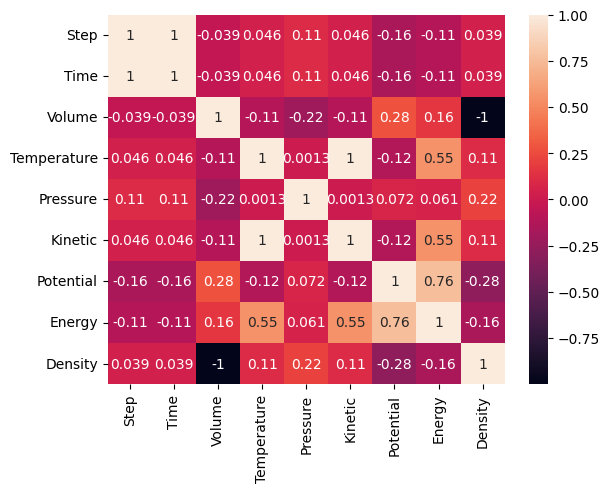

In [114]:
sns.heatmap(data.corr(), annot=True)

In [115]:
scaler=StandardScaler()

In [116]:
scaler

StandardScaler()

In [117]:
scaled_data=scaler.fit_transform(data)

In [118]:
scaled_data

array([[-1.72336879, -1.72336879,  1.40836636, ...,  0.03986086,
        -0.51190878, -1.39729555],
       [-1.70596103, -1.70596103,  2.22316798, ...,  0.70852286,
         0.1324101 , -2.1719619 ],
       [-1.68855326, -1.68855326,  0.7992209 , ...,  0.74789921,
         0.60033044, -0.80643712],
       ...,
       [ 1.68855326,  1.68855326,  0.8411194 , ...,  0.7460592 ,
         1.54452683, -0.84745977],
       [ 1.70596103,  1.70596103,  0.11011476, ...,  0.71625093,
         0.32923373, -0.12493188],
       [ 1.72336879,  1.72336879, -1.06409622, ..., -1.53519327,
        -1.12373319,  1.06869478]])

In [124]:
features=scaled_data.T

In [126]:
features

array([[-1.72336879, -1.70596103, -1.68855326, ...,  1.68855326,
         1.70596103,  1.72336879],
       [-1.72336879, -1.70596103, -1.68855326, ...,  1.68855326,
         1.70596103,  1.72336879],
       [ 1.40836636,  2.22316798,  0.7992209 , ...,  0.8411194 ,
         0.11011476, -1.06409622],
       ...,
       [ 0.03986086,  0.70852286,  0.74789921, ...,  0.7460592 ,
         0.71625093, -1.53519327],
       [-0.51190878,  0.1324101 ,  0.60033044, ...,  1.54452683,
         0.32923373, -1.12373319],
       [-1.39729555, -2.1719619 , -0.80643712, ..., -0.84745977,
        -0.12493188,  1.06869478]])

In [128]:
covariance_matrix=np.cov(features)

In [130]:
covariance_matrix

array([[ 1.00505051,  1.00505051, -0.03929762,  0.04605833,  0.10874596,
         0.04606231, -0.16358591, -0.1074287 ,  0.03968996],
       [ 1.00505051,  1.00505051, -0.03929762,  0.04605833,  0.10874596,
         0.04606231, -0.16358591, -0.1074287 ,  0.03968996],
       [-0.03929762, -0.03929762,  1.00505051, -0.10777081, -0.21839712,
        -0.10776782,  0.27677323,  0.1622804 , -1.00485475],
       [ 0.04605833,  0.04605833, -0.10777081,  1.00505051,  0.00133233,
         1.0050505 , -0.12307682,  0.55362864,  0.10683388],
       [ 0.10874596,  0.10874596, -0.21839712,  0.00133233,  1.00505051,
         0.00132843,  0.07199525,  0.06141656,  0.21813727],
       [ 0.04606231,  0.04606231, -0.10776782,  1.0050505 ,  0.00132843,
         1.00505051, -0.12307662,  0.55362881,  0.1068309 ],
       [-0.16358591, -0.16358591,  0.27677323, -0.12307682,  0.07199525,
        -0.12307662,  1.00505051,  0.76471199, -0.27731327],
       [-0.1074287 , -0.1074287 ,  0.1622804 ,  0.55362864,  0

In [132]:
values, vectors=np.linalg.eig(covariance_matrix)

In [134]:
values

array([ 2.51176929e+00,  2.46121529e+00,  1.93917218e+00,  1.33937635e+00,
        7.93726416e-01,  1.95015408e-04, -1.74229046e-16,  8.07708374e-09,
        7.75445120e-10])

In [136]:
vectors

array([[-2.82743073e-01, -1.74717289e-01,  5.99946322e-01,
        -1.18421635e-01,  1.24783548e-01, -1.30567200e-04,
        -7.07106781e-01, -7.88276217e-06,  1.36424666e-06],
       [-2.82743073e-01, -1.74717289e-01,  5.99946322e-01,
        -1.18421635e-01,  1.24783548e-01, -1.30567200e-04,
         7.07106781e-01, -7.88544199e-06,  1.36828798e-06],
       [ 3.81691771e-01,  3.24563269e-01,  3.70273882e-01,
         2.14416983e-01, -2.56708525e-01,  7.07102126e-01,
         8.79513119e-14,  3.62948045e-05,  2.91729916e-05],
       [ 2.37741020e-01, -5.58514414e-01,  2.19528443e-02,
         2.51581138e-01, -1.10137378e-01,  2.45215279e-04,
         2.46246888e-09, -2.57881544e-01,  6.99380208e-01],
       [-1.10849462e-01, -1.30798195e-01, -2.66197220e-02,
        -5.42982778e-01, -8.21623570e-01,  1.78416863e-04,
        -8.63943883e-15,  6.79542383e-07, -2.77892371e-06],
       [ 2.37741273e-01, -5.58513995e-01,  2.19565101e-02,
         2.51582843e-01, -1.10133895e-01,  2.997606

In [138]:
values.shape

(9,)

In [140]:
vectors.shape

(9, 9)

In [142]:
#For calculating the percentage contribution of the eigen values
percentage_variance=[]
for i in range(len(values)):
    percentage_variance.append(values[i]/np.sum(values))

In [144]:
percentage_variance

[np.float64(0.2776830370803721),
 np.float64(0.2720941526363865),
 np.float64(0.21438084362759757),
 np.float64(0.14807175715403573),
 np.float64(0.08774864903056713),
 np.float64(2.1559492369398394e-05),
 np.float64(-1.9261502551262223e-17),
 np.float64(8.929439305673902e-10),
 np.float64(8.572760122542817e-11)]

In [146]:
proj_1=scaled_data.dot(vectors.T[0])
proj_2=scaled_data.dot(vectors.T[1])
result=pd.DataFrame(proj_1, columns=['PC1'])
result['PC2']=proj_2

In [148]:
result

,PC1,PC2
0,1.282047,2.439715
1,2.748305,2.948970
2,2.364992,1.316817
3,3.306351,1.145897
4,2.572622,2.381815
...,...,...
194,0.132476,0.404435
195,2.463299,1.230716
196,1.514720,-1.871266
197,-0.688947,-0.159016


<Axes: >

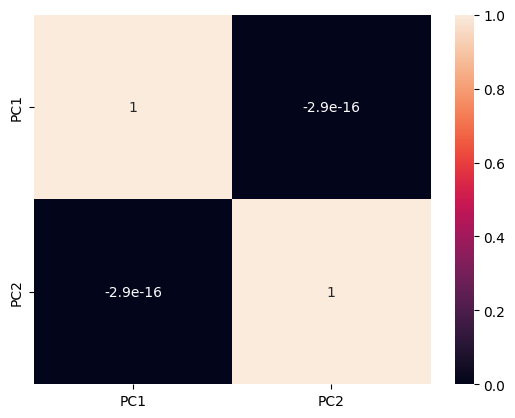

In [150]:
#Draw the heatmap of the resulting dataset to calculate correlation between the Principal Components
sns.heatmap(result.corr(), annot=True)

/tmp/ipykernel_9313/2709892902.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0, 0.5, '2nd Principal Component')

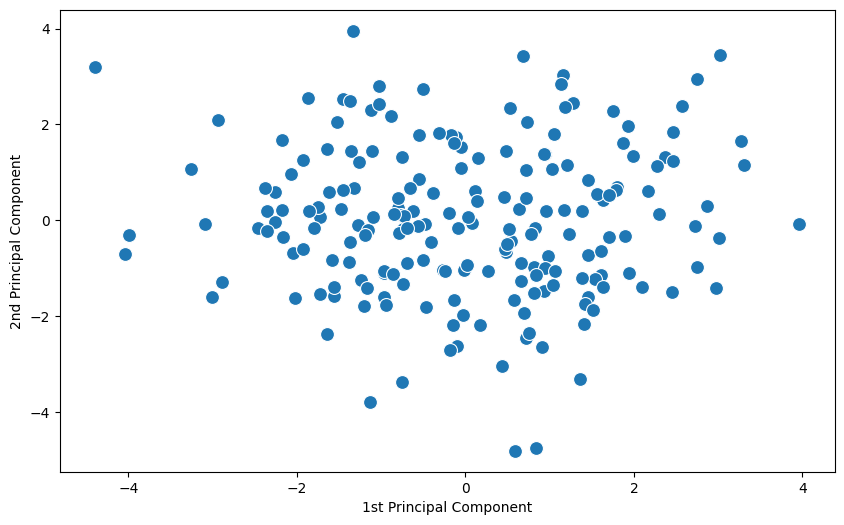

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result['PC1'], y=result['PC2'], data=result, palette='Set1', s=100)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

In [154]:
slope, intercept=np.polyfit(result['PC1'], result['PC2'], 1)
x_vals=np.linspace(min(result['PC1']), max(result['PC2']), 100)
y_vals=slope*x_vals+intercept

In [156]:
slope

np.float64(-2.190485779141168e-16)

In [158]:
intercept

np.float64(-1.4481098733646762e-15)

In [160]:
x_vals

array([-4.39784916, -4.31347326, -4.22909736, -4.14472147, -4.06034557,
       -3.97596967, -3.89159378, -3.80721788, -3.72284198, -3.63846609,
       -3.55409019, -3.46971429, -3.3853384 , -3.3009625 , -3.2165866 ,
       -3.13221071, -3.04783481, -2.96345891, -2.87908302, -2.79470712,
       -2.71033122, -2.62595533, -2.54157943, -2.45720353, -2.37282764,
       -2.28845174, -2.20407584, -2.11969995, -2.03532405, -1.95094815,
       -1.86657225, -1.78219636, -1.69782046, -1.61344456, -1.52906867,
       -1.44469277, -1.36031687, -1.27594098, -1.19156508, -1.10718918,
       -1.02281329, -0.93843739, -0.85406149, -0.7696856 , -0.6853097 ,
       -0.6009338 , -0.51655791, -0.43218201, -0.34780611, -0.26343022,
       -0.17905432, -0.09467842, -0.01030253,  0.07407337,  0.15844927,
        0.24282516,  0.32720106,  0.41157696,  0.49595285,  0.58032875,
        0.66470465,  0.74908055,  0.83345644,  0.91783234,  1.00220824,
        1.08658413,  1.17096003,  1.25533593,  1.33971182,  1.42

In [162]:
y_vals

array([-4.84767269e-16, -5.03249690e-16, -5.21732110e-16, -5.40214530e-16,
       -5.58696950e-16, -5.77179370e-16, -5.95661791e-16, -6.14144211e-16,
       -6.32626631e-16, -6.51109051e-16, -6.69591471e-16, -6.88073892e-16,
       -7.06556312e-16, -7.25038732e-16, -7.43521152e-16, -7.62003572e-16,
       -7.80485993e-16, -7.98968413e-16, -8.17450833e-16, -8.35933253e-16,
       -8.54415673e-16, -8.72898094e-16, -8.91380514e-16, -9.09862934e-16,
       -9.28345354e-16, -9.46827774e-16, -9.65310195e-16, -9.83792615e-16,
       -1.00227503e-15, -1.02075746e-15, -1.03923988e-15, -1.05772230e-15,
       -1.07620472e-15, -1.09468714e-15, -1.11316956e-15, -1.13165198e-15,
       -1.15013440e-15, -1.16861682e-15, -1.18709924e-15, -1.20558166e-15,
       -1.22406408e-15, -1.24254650e-15, -1.26102892e-15, -1.27951134e-15,
       -1.29799376e-15, -1.31647618e-15, -1.33495860e-15, -1.35344102e-15,
       -1.37192344e-15, -1.39040586e-15, -1.40888828e-15, -1.42737070e-15,
       -1.44585312e-15, -

Text(0, 0.5, '2nd Principal Component')

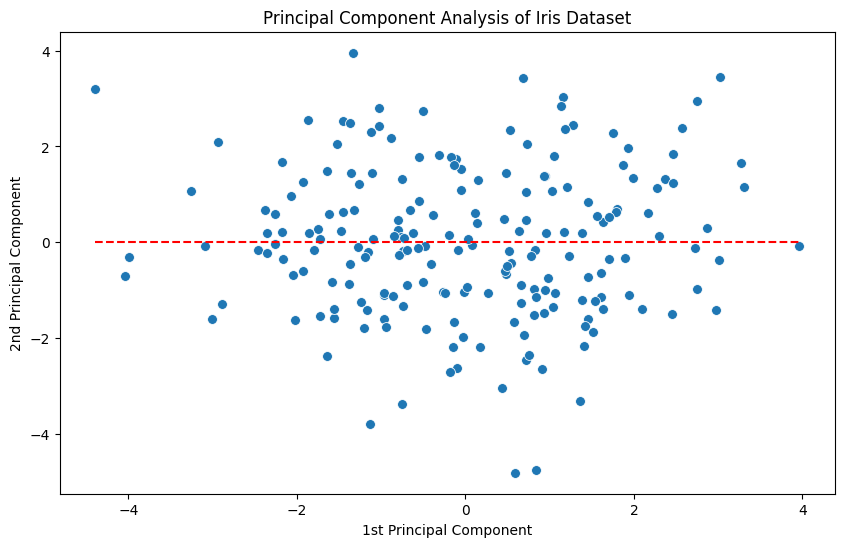

In [164]:
#Generate the scatter plot for the PCA with respect to the Species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result['PC1'], y=result['PC2'], s=50)
plt.plot(x_vals, y_vals, color='red', linestyle='--')
plt.title('Principal Component Analysis of Iris Dataset')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

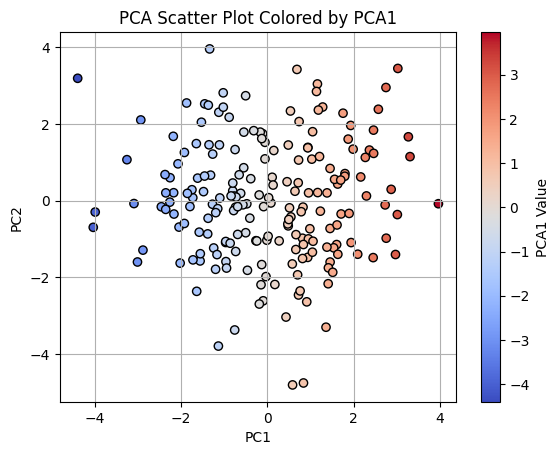

In [165]:
scatter = plt.scatter(result['PC1'], result['PC2'], c=result['PC1'], cmap='coolwarm', marker='o', edgecolor='k')
plt.title('PCA Scatter Plot Colored by PCA1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='PCA1 Value')
plt.grid(True)

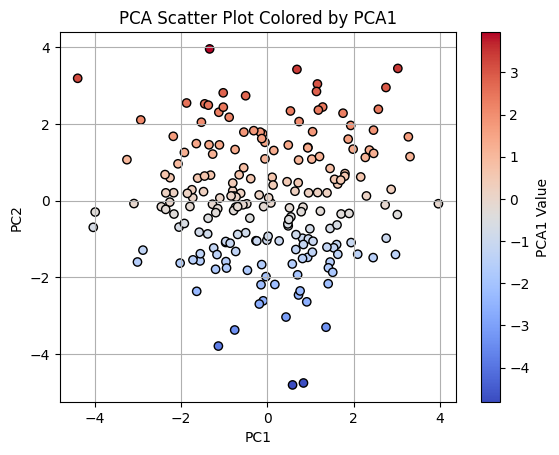

In [168]:
scatter = plt.scatter(result['PC1'], result['PC2'], c=result['PC2'], cmap='coolwarm', marker='o', edgecolor='k')
plt.title('PCA Scatter Plot Colored by PCA1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='PCA1 Value')
plt.grid(True)

In [169]:
#If I had 3 Principal Components instead of 3

In [172]:
proj_1=scaled_data.dot(vectors.T[0])
proj_2=scaled_data.dot(vectors.T[1])
proj_3=scaled_data.dot(vectors.T[2])
result=pd.DataFrame(proj_1, columns=['PC1'])
result['PC2']=proj_2
result['PC3']=proj_3

In [174]:
result

,PC1,PC2,PC3
0,1.282047,2.439715,-1.120451
1,2.748305,2.948970,-0.394121
2,2.364992,1.316817,-1.321479
3,3.306351,1.145897,-0.779128
4,2.572622,2.381815,-1.189811
...,...,...,...
194,0.132476,0.404435,3.006078
195,2.463299,1.230716,3.994125
196,1.514720,-1.871266,2.840334
197,-0.688947,-0.159016,2.144615


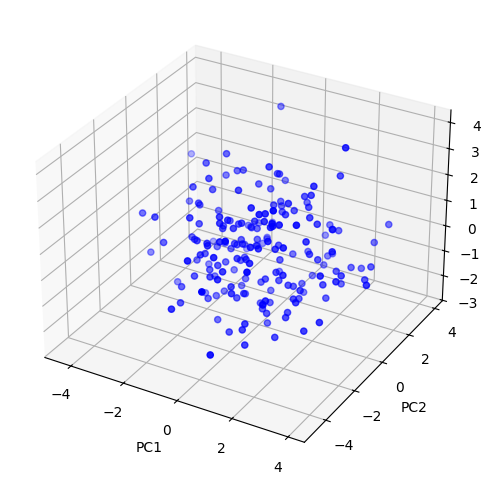

In [177]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PC1'], result['PC2'],result['PC3'], c='b', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

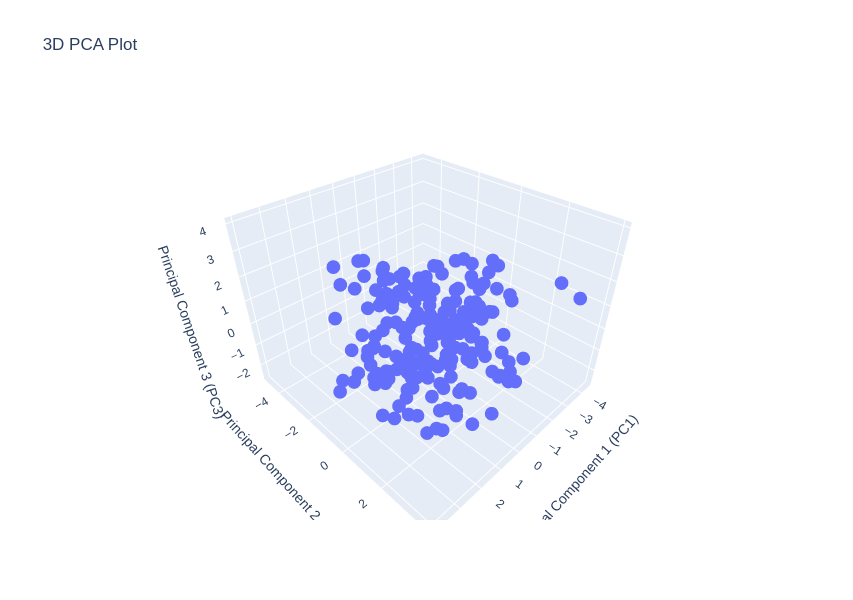

In [180]:
fig = go.Figure(data=[go.Scatter3d(
    x=result['PC1'],  # x-axis values
    y=result['PC2'],  # y-axis values
    z=result['PC3'],  # z-axis values
    mode='markers'    # Display as scatter plot
)])

# Update layout: add title, axis labels, and adjust plot size
fig.update_layout(
    title="3D PCA Plot",  # Title of the plot
    scene=dict(
        xaxis=dict(title='Principal Component 1 (PC1)'),  # Label for x-axis
        yaxis=dict(title='Principal Component 2 (PC2)'),  # Label for y-axis
        zaxis=dict(title='Principal Component 3 (PC3)'),  # Label for z-axis
    ),
    width=800,  # Set width of the plot
    height=600, # Set height of the plot
)

# Show the plot
fig.show()